### Student Information
Name: Shubhranshi Kapoor

Student ID: 109164422

GitHub ID: shubhranshi

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

### Contents
#### PART 1
1. Takehome and in-class exercises

#### PART 2
1. Loading new dataset
2. Performing basic operations on dataset

#### PART 3
1. Generating new visualizations
2. Generate TF-IDF features
3. Inplement Naive Bayes classifier

#### PART 4
1. Improving the Data preprocessing task

---

# PART 1

Completing takehome exercises

In [3]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. The Data
In this notebook we will explore the popular 20 newsgroup dataset, originally provided [here](http://qwone.com/~jason/20Newsgroups/). The dataset is called "Twenty Newsgroups", which means there are 20 categories of news articles available in the entire dataset.

---

## 2. Data Preparation


In [4]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [5]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

Let's take at look some of the records that are contained in our subset of the data

In [6]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

**Note** the `twenty_train` is just a bunch of objects that can be accessed as python dictionaries; so, you can do the following operations on `twenty_train`

In [7]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [8]:
len(twenty_train.data)

2257

In [9]:
len(twenty_train.filenames)

2257

#### We can also print an example from the subset

In [10]:
# An example of what the subset contains
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



... and determine the label of the example via `target_names` key value

In [11]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [12]:
twenty_train.target[0]

1

... we can also get the category of 10 documents via `target` key value 

In [13]:
# category of first 10 documents.
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

Here is one way to get access to the *text* version of the label of a subset of our training data:

In [14]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


---

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [15]:
# Answer here
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

---

## 3. Data Transformation


### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [16]:
twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [17]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [18]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [19]:
len(X)

2257

In [20]:
X[0:2]

text
0  From: sd345@city.ac.uk (Michael Collier) Subje...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...

In [21]:
for t in X["text"][:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

### Adding Columns

One of the great advantages of a pandas dataframe is its flexibility. We can add columns to the current dataset programmatically with very little effort.

In [22]:
# add category to the dataframe
X['category'] = twenty_train.target

In [23]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

Now we can print and see what our table looks like. 

In [24]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med  
9                 sci.med

### 3.2 Familiarizing yourself with the Data

To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `text` and `category_name` attributes or fields.

In [25]:
# a simple query
X[0:10][["text", "category_name"]]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### Let's query the last 10 records

In [26]:
X[-10:]

text  category  \
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  
2250             alt.atheism  
2251                 sci.med  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med

Ready for some sourcery? Brace yourselves! Let us see if we can query every 10th record in our dataframe. In addition, our query must only contain the first 10 records. For this we will use the build-in function called `iloc`. This allows us to query a selection of our dataset by position. 

In [27]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

text  category
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3
80  From: annick@cortex.physiol.su.oz.au (Annick A...         2
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...         0

You can also use the `loc` function to explicity define the columns you want to query. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [28]:
# using loc (by label)
X.loc[::10, 'text'][0:10]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...
60    From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...
70    From: weaver@chdasic.sps.mot.com (Dave Weaver)...
80    From: annick@cortex.physiol.su.oz.au (Annick A...
90    Subject: Vonnegut/atheism From: dmn@kepler.unh...
Name: text, dtype: object

In [29]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2   
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3   
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1   
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0   
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
80  From: annick@cortex.physiol.su.oz.au (Annick A...         2   
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...         0   

             category_name  
0            comp.graphics  
10  soc.religion.christian  
20  soc.religion.christian  
30                 sci.med  
40  soc.religion.christian  
50           comp.graphics  
60             alt.atheism  
70  soc.religion.christian  
80                 sci.med  
90             alt.atheism

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [30]:
#Answer here

# First - selection by callable
X.iloc[:, lambda X: [0, 1]] 

text  category
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3
...                                                 ...       ...
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2

[2257 rows x 2 columns]

In [31]:
# Second - access a scalar value
X.iat[4,1]

3

In [32]:
# Third - selecting random samples
X.sample(frac=0.005) 

text  category  \
305   From: livesey@solntze.wpd.sgi.com (Jon Livesey...         0   
608   From: hudson@athena.cs.uga.edu (Paul Hudson Jr...         3   
1639  From: eggertj@moses.atc.ll.mit.edu (Jim Eggert...         3   
508   From: brownli@ohsu.edu@ohsu.edu (Liane Brown) ...         3   
2062  From: qpliu@ernie.Princeton.EDU (q.p.liu) Subj...         0   
1632  From: khan0095@nova.gmi.edu (Mohammad Razi Kha...         1   
238   Subject: Origin of Morphine From: chinsz@eis.c...         2   
2087  From: dutc0006@student.tc.umn.edu (David J Dut...         1   
1284  From: mussack@austin.ibm.com (Christopher Muss...         3   
2027  Subject: Re: <Political Atheists? From: bobbe@...         0   
447   From: kxgst1+@pitt.edu (Kenneth Gilbert) Subje...         2   

               category_name  
305              alt.atheism  
608   soc.religion.christian  
1639  soc.religion.christian  
508   soc.religion.christian  
2062             alt.atheism  
1632           comp.graphics  
238                  sci.med  
2087           comp.graphics  
1284  soc.religion.christian  
2027             alt.atheism  
447                  sci.med

In [33]:
# Fourth - using query method
X.query('category > 1') 

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[1193 rows x 3 columns]

---

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [34]:
# Answer here
X.loc[lambda k: k.category_name == 'sci.med'].iloc[::10, :][0:5]

text  category category_name
7    From: aldridge@netcom.com (Jacquelin Aldridge)...         2       sci.med
49   From: jimj@contractor.EBay.Sun.COM (Jim Jones)...         2       sci.med
82   From: jason@ab20.larc.nasa.gov (Jason Austin) ...         2       sci.med
118  From: rogers@calamari.hi.com (Andrew Rogers) S...         2       sci.med
142  From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...         2       sci.med

---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [35]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

Okay, a lot happened there in that one line of code, so let's break it down. First, with the `isnull` we tranformed our table into the **True/False** table you see above, where **True** in this case means that the data is missing and **False** means that the data is present. We then take the transformed table and apply a function to each row that essentially counts to see if there are missing values in each record and print out how much missing values we found. In other words the `check_missing_values` function looks through each field (attribute or column) in the dataset and counts how many missing values were found. 

There are many other clever ways to check for missing data, and that is what makes Pandas so beautiful to work with. You get the control you need as a data scientist or just a person working in data mining projects. Indeed, Pandas makes your life easy!

---

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [36]:
# Answer here
X.isnull().apply(lambda a: dmh.check_missing_values(a), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

---

We have our function to check for missing records, now let us do something mischievous and insert some dummy data into the dataframe and test the reliability of our function. This dummy data is intended to corrupt the dataset. I mean this happens a lot today, especially when hackers want to hijack or corrupt a database.

We will insert a `Series`, which is basically a "one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index.", into our current dataframe.

In [37]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [38]:
dummy_series

text        dummy_record
category               1
dtype: object

In [39]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [40]:
# check if the records was commited into result
len(result_with_series)

2258

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [41]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice that above we are not changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [42]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [43]:
X = X.append(dummy_dict, ignore_index=True)

In [44]:
len(X)

2258

In [45]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [46]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [47]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [48]:
len(X)

2257

And we are back with our original dataset, clean and tidy as we want it. That's enough on how to deal with missing values, let us now move unto something more fun. 

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [49]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [50]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [51]:
# Answer here
print(NA_df['missing_example'].values.tolist())
'''
In the dictionery - The value of missing_example column for ID A is np.nan , B is missing, E is None.
So when it is converted to dataframe, it stores NaN for the missing_example_column.
Therefore values for A,B and E is considered as missing value and identified by isnull().

The value of missing_example column for ID C is string 'Nan' , D is string 'None', F is empty string ''.
When converted to dataframe, they are stored as string values.
Since these values are string values , isnull() returns false for them. 
'''

[nan, nan, 'NaN', 'None', None, '']


"\nIn the dictionery - The value of missing_example column for ID A is np.nan , B is missing, E is None.\nSo when it is converted to dataframe, it stores NaN for the missing_example_column.\nTherefore values for A,B and E is considered as missing value and identified by isnull().\n\nThe value of missing_example column for ID C is string 'Nan' , D is string 'None', F is empty string ''.\nWhen converted to dataframe, they are stored as string values.\nSince these values are string values , isnull() returns false for them. \n"

---

### 4.2 Dealing with Duplicate Data


In [52]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2252    False
2253    False
2254    False
2255    False
2256    False
Length: 2257, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [53]:
sum(X.duplicated())

0

In [54]:
sum(X.duplicated('text'))

0

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [55]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [56]:
X = X.append(dummy_duplicate_dict, ignore_index=True)

In [57]:
len(X)

2259

In [58]:
sum(X.duplicated('text'))

1

We have added the dummy duplicates to `X`. Now we are faced with the decision as to what to do with the duplicated records after we have found it. In our case, we want to get rid of all the duplicated records without preserving a copy. We can simply do that with the following line of code:

In [59]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [60]:
len(X)

2257

---

## 5.  Data Preprocessing

### 5.1 Sampling


In [61]:
X_sample = X.sample(n=1000) #random state

In [62]:
len(X_sample)

1000

In [63]:
X_sample[0:4]

text  category  \
1082  From: ls8139@albnyvms.bitnet (larry silverberg...         2   
1908  From: geoffrey@cosc.canterbury.ac.nz (Geoff Th...         1   
1372  Subject: Re: The Inimitable Rushdie From: kmag...         0   
728   From: x92lee22@gw.wmich.edu Subject: Re: Is MS...         2   

      category_name  
1082        sci.med  
1908  comp.graphics  
1372    alt.atheism  
728         sci.med

---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [64]:
# Answer here
print("X dataframe length ",len(X))
print("X_sample dataframe length ",len(X_sample))

"""
 X is normal state and is stable.
 X_sample is random state and is unstable.
 
 As we can see, there is no effect on the existing X dataframe,
 and the new dataframe X_sample (sample of X dataframe ) is generated randomly. 
 So in different execution, X_sample gives different set of data.
 X dataframe contains all the records but X_sample dataframe contains randomly selected 1000 records only.
"""


X dataframe length  2257
X_sample dataframe length  1000


'\n X is normal state and is stable.\n X_sample is random state and is unstable.\n \n As we can see, there is no effect on the existing X dataframe,\n and the new dataframe X_sample (sample of X dataframe ) is generated randomly. \n So in different execution, X_sample gives different set of data.\n X dataframe contains all the records but X_sample dataframe contains randomly selected 1000 records only.\n'

---

To generate some visualizations, we are going to use `matplotlib` python library.

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


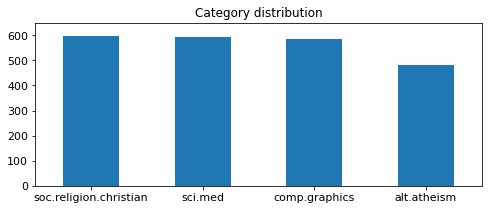

In [68]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

soc.religion.christian    280
comp.graphics             262
sci.med                   248
alt.atheism               210
Name: category_name, dtype: int64


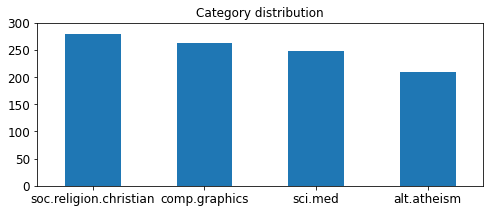

In [69]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)```

---

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

soc.religion.christian    280
comp.graphics             262
sci.med                   248
alt.atheism               210
Name: category_name, dtype: int64


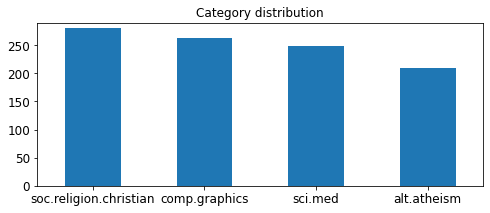

In [70]:
# Answer here

# plot barchart for X_sample
upper_limit = max(X_sample.category_name.value_counts()) + 10

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_limit], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

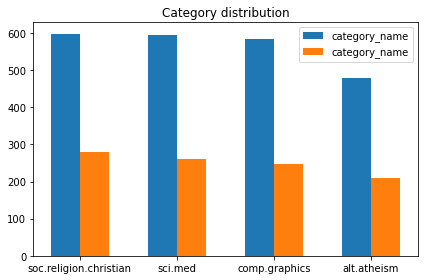

In [71]:
# Answer here
labels = X.category_name.value_counts().index

X_category_count = list(X.category_name.value_counts())
X_sample_category_count = list(X_sample.category_name.value_counts())

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, X_category_count, width, label='category_name')
ax.bar(x + width/2, X_sample_category_count, width, label='category_name')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Category distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

---

### 5.2 Feature Creation


```python
import nltk
```

In [72]:
import nltk

In [73]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [74]:
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [75]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [77]:
#list(X[0:1]['unigrams'])

The `nltk` library does a pretty decent job of tokenizing our text. There are many other tokenizers online, such as [spaCy](https://spacy.io/), and the built in libraries provided by [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). We are making use of the NLTK library because it is open source and because it does a good job of segmentating text-based data. 

---

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Initially, it won't have the same shape as the table above, but we will get into that later. For now, let us use scikit learn built in functionalities to generate this document. You will see for yourself how easy it is to generate this table without much coding. 

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

What we did with those two lines of code is that we transorfmed the articles into a **term-document matrix**. Those lines of code tokenize each article using a built-in, default tokenizer (often referred to as an `analzyer`) and then produces the word frequency vector for each document. We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by `CountVectorizer`. Let us look closely at this analyzer. 

In [79]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

---

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [80]:
# Answer here
analyze(" ".join(list(X[:1].text)))

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

---

Now let us look at the term-document matrix we built above.

In [81]:
# We can check the shape of this matrix by:
X_counts.shape

(2257, 35788)

In [82]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

![alt txt](https://i.imgur.com/57gA1sd.png)

Above we can see the features found in the all the documents `X`, which are basically all the terms found in all the documents. As I said earlier, the transformation is not in the pretty format (table) we saw above -- the term-document matrix. We can do many things with the `count_vect` vectorizer and its transformation `X_counts`. You can find more information on other cool stuff you can do with the [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction). 

Now let us try to obtain something that is as close to the pretty table I provided above. Before jumping into the code for doing just that, it is important to mention that the reason for choosing the `fit_transofrm` for the `CountVectorizer` is that it efficiently learns the vocabulary dictionary and returns a term-document matrix.

In the next bit of code, we want to extract the first five articles and transform them into document-term matrix, or in this case a 2-dimensional array. Here it goes. 

In [83]:
X[0:5]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...  
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...

In [84]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

As you can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fifth record, specifically, contains a `1` in the beginning, which from our feature names we can deduce that this article contains exactly one `00` term.

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [85]:
# Answer here

record_num = 4 # for fifth record
arr = X_counts[record_num , 0:100].toarray()
x = np.where(arr == 1) # finding all terms where frequency is 1

print("Index of 2nd 1 is",x[1][1])
print("The 2nd 1 represents term -",count_vect.get_feature_names()[x[1][1]])

Index of 2nd 1 is 37
The 2nd 1 represents term - 01


---

We can also use the vectorizer to generate word frequency vector for new documents or articles. Let us try that below:

In [86]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Now let us put a `00` in the document to see if it is detected as we expect. 

In [87]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [89]:
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [90]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [91]:
plot_z = X_counts[0:20, 0:20].toarray()

For the heat map, we are going to use another visualization library called `seaborn`. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. See comparison below.

![alt txt](https://i.imgur.com/1isxmIV.png)

The other big advantage of seaborn is that seaborn has some built-in plots that matplotlib does not support. Most of these can eventually be replicated by hacking away at matplotlib, but they’re not built in and require much more effort to build.

So without further ado, let us try it now!

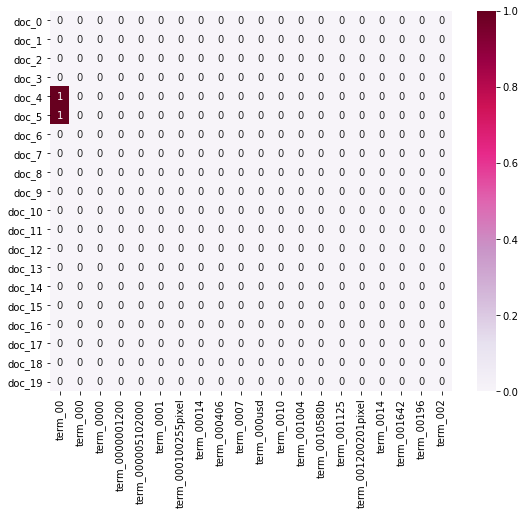

In [92]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

We can select a subset of data and terms to observe terms with different frequency.


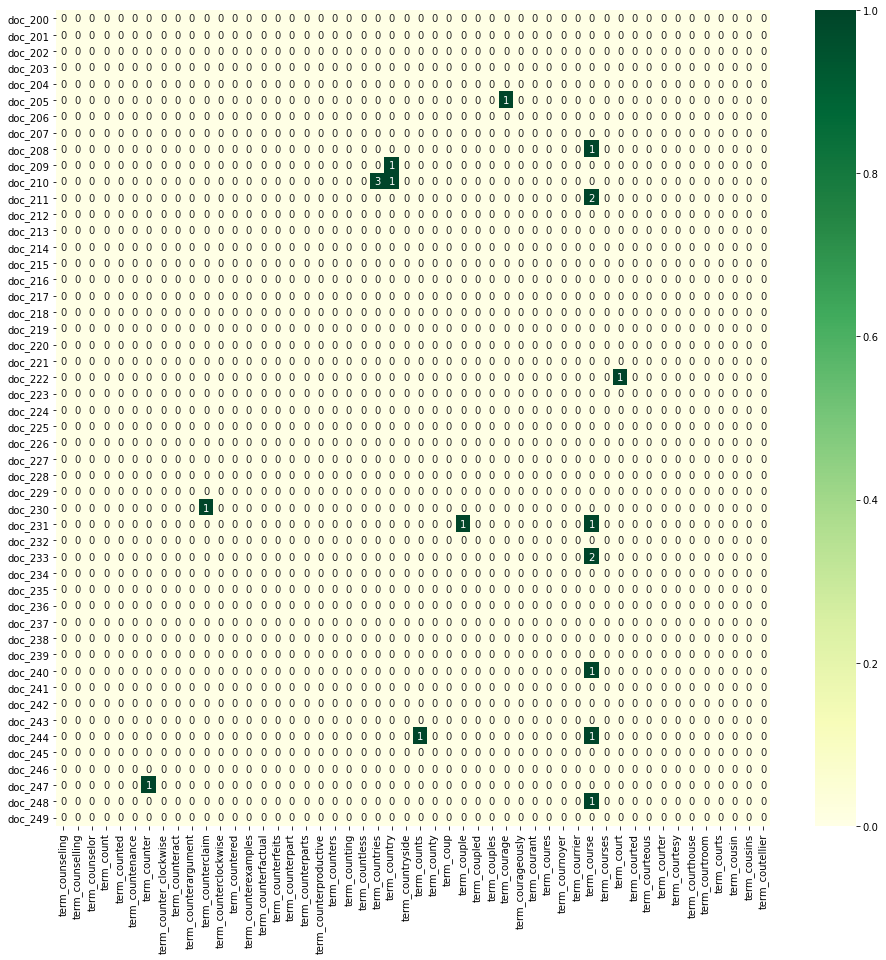

In [93]:
# Answer here

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[10000:10050]] #taking 10000th to 10049th terms, 50 terms
plot_y = ["doc_"+ str(i) for i in list(X.index)[200:250]] # taking document records from 200 to 250, 50 records
plot_z = X_counts[200:250, 10000:10050].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(16, 15))
ax = sns.heatmap(df_todraw,
                 cmap="YlGn",
                 vmin=0, vmax=1, annot=True)

print('We can select a subset of data and terms to observe terms with different frequency.') 

---

### 5.4 Dimensionality Reduction


[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [94]:
from sklearn.decomposition import PCA

In [95]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [96]:
X_reduced.shape

(2257, 2)

In [97]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

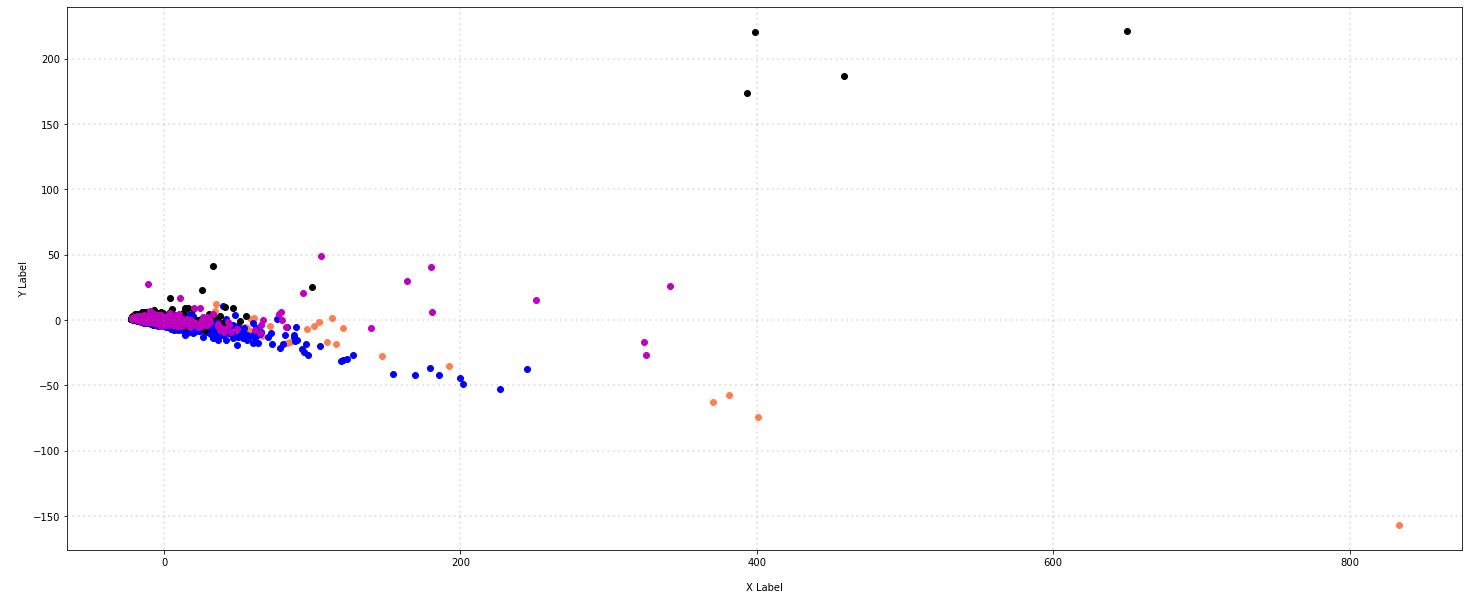

In [98]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

From the 2D visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by category, but it is not immediately clear. The PCA was applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. Later on in the course you will learn about different approaches on how to create better features from the term-vector matrix, such as term-frequency inverse document frequency so-called TF-IDF.

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

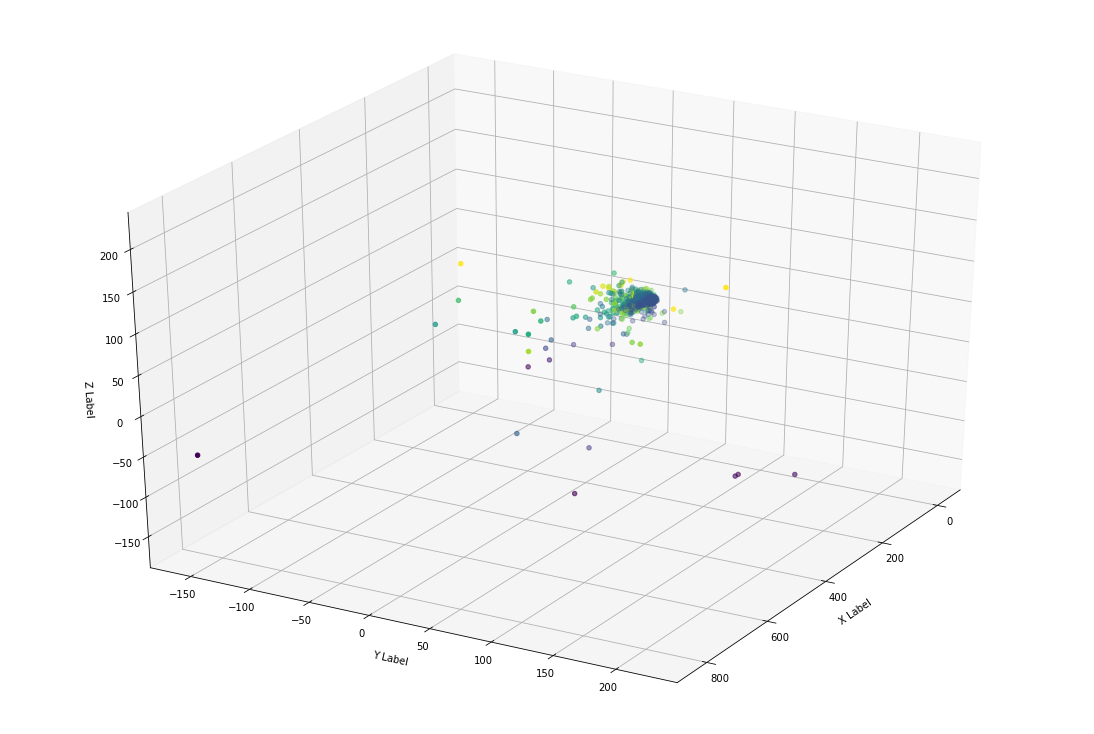

In [99]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D

X_reducedTo3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
#print(X_reducedTo3.shape)

# plot
fig = plt.figure(figsize = (15,10))
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reducedTo3[X['category_name'] == category].T[0]
    ys = X_reducedTo3[X['category_name'] == category].T[1]
    zs = X_reducedTo3[X['category_name'] == category].T[2]
   
    ax.scatter3D(xs, ys, zs, zdir='z', c=zs);

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

# for other 2 angles
#ax.view_init(0,30)
#ax.view_init(30,0)

ax.view_init(30,30)
plt.show()

---

### 5.5 Atrribute Transformation / Aggregation


compute frequencies for each term in all documents

In [100]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [101]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [102]:
term_frequencies[0]

134

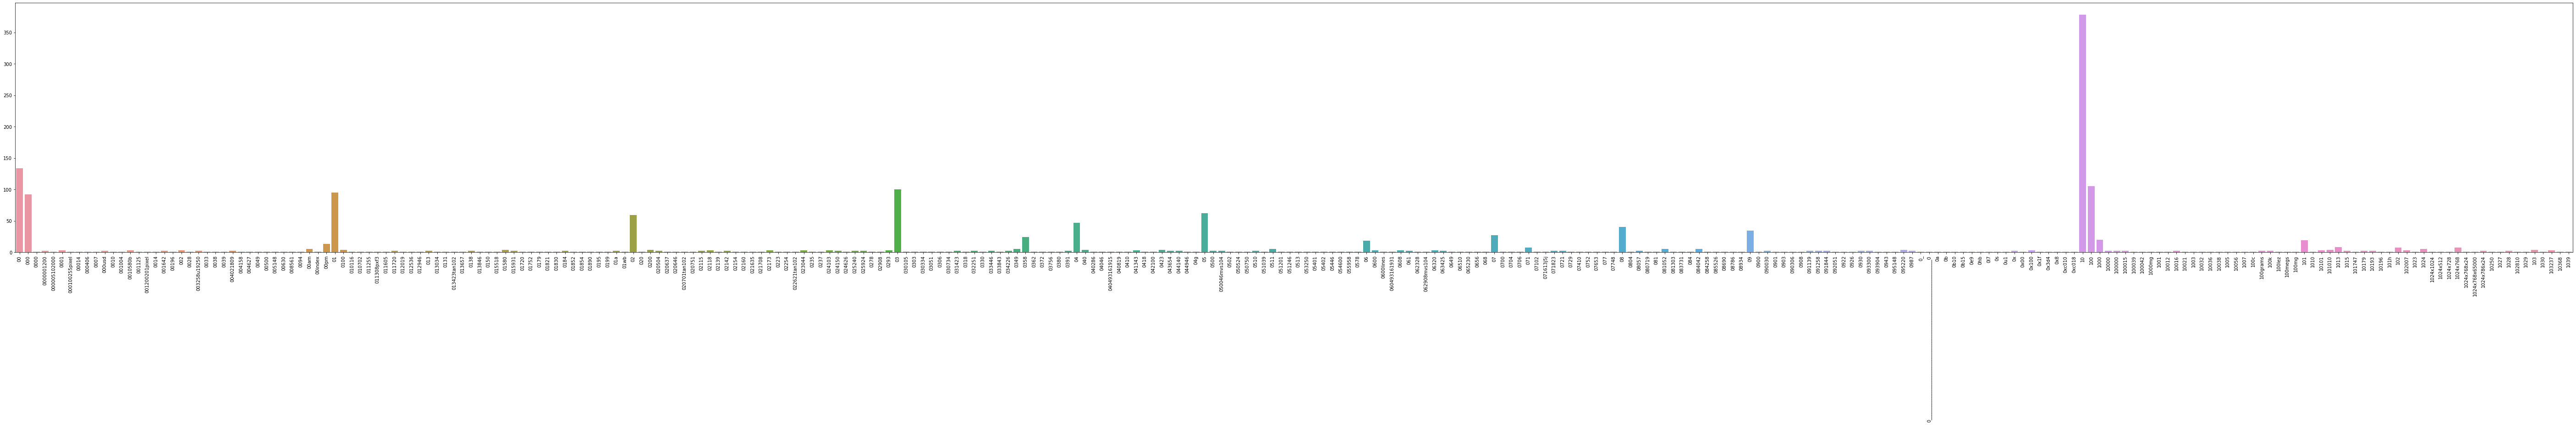

In [103]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [104]:
# Answer here

!pip install chart-studio

import pandas as pd
import numpy as np
import scipy as sp
import plotly
import chart_studio.plotly as py 
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [105]:
import plotly.graph_objects as go
import plotly.io as pio

feature=count_vect.get_feature_names()
freq=term_frequencies

fig = go.Figure(data=go.Bar(x=feature, y=freq)) #,layout=go.Layout(height=700, width=1200))
fig.update_layout(title_text='term frequency distribution')
pio.show(fig)

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [106]:
# Answer here
import plotly.graph_objects as go
import plotly.io as pio

#visualizing for a specific range
feature=count_vect.get_feature_names()[10000:10080]  # [5900:5970]
freq=term_frequencies[10000:10080]

fig = go.Figure(data=go.Bar(x=feature, y=freq)) #,layout=go.Layout(height=800, width=1000))
fig.update_layout(title_text='term frequency distribution')
pio.show(fig)

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [107]:
# Answer here
import plotly.graph_objects as go
import plotly.io as pio


feature=count_vect.get_feature_names()[10000:10500]
freq=term_frequencies[10000:10500]

A = pd.DataFrame({'feature': feature, 'frequency': freq})
A = A.sort_values(by='frequency', ascending=False)

fig = go.Figure(
    data=[go.Bar(x=A['feature'].tolist(), y=A['frequency'].tolist(),marker_color="crimson")],
    layout=go.Layout(height=700, width=1000))
fig.update_layout(title_text='term frequency distribution')
pio.show(fig)

---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [108]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

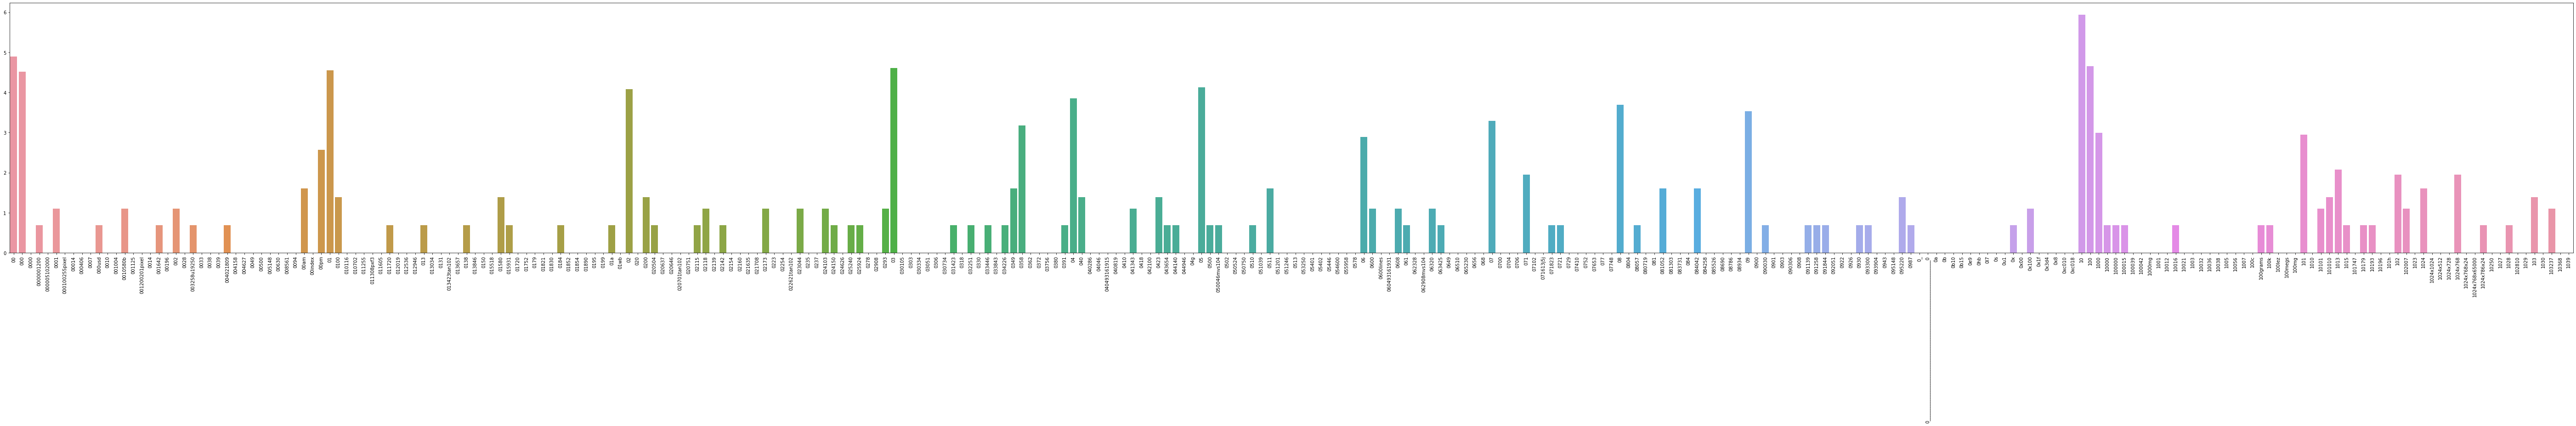

In [109]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [110]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [111]:
mlb = preprocessing.LabelBinarizer()

In [112]:
mlb.fit(X.category)

LabelBinarizer()

In [113]:
mlb.classes_

array([0, 1, 2, 3], dtype=int64)

In [114]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [115]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

Take a look at the new attribute we have added to the `X` table. You can see that the new attribute, which is called `bin_category`, contains an array of 0's and 1's. The `1` is basically to indicate the position of the label or category we binarized. If you look at the first two records, the one is places in slot 2 in the array; this helps to indicate to any of the algorithms which we are feeding this data to, that the record belong to that specific category. 

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization** (please refer to the text book for more inforamation).

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [116]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()  
X[0:10] 

#Yes it works.

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   
9                 sci.med  [From, :, libman, @, hsc.usc.edu, (, Marlena, ...   

   bin_category bin_category_name  
0  [0, 1, 0, 0]      [0, 1, 0, 0]  
1  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  [0, 0, 0, 1]      [0, 0, 0, 1]  
7  [0, 0, 1, 0]      [0, 0, 1, 0]  
8  [0, 0, 1, 0]      [0, 0, 1, 0]  
9  [0, 0, 1, 0]      [0, 0, 1, 0]

---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [117]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [118]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [119]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [120]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0. 

We can assume that we have the more common features in bthe documents 1 and 3 than in documents 1 and 2. This reflects indeed in a higher similarity than that of sentences 1 and 3. 


---

# PART 2

## 1. Loading the new dataset

First we load the data from new dataset which we will use in this section. The dataset is in .txt format where values are tab\t seperated. We consolidate the data from 3 different sources.

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh

In [122]:
# read and concatinate files into a drataframe D

file1=pd.read_csv('sentiment_labelled_sentences/yelp_labelled.txt',delimiter='\t',header=None)
file2=pd.read_csv('sentiment_labelled_sentences/imdb_labelled.txt',delimiter='\t',header=None)
file3=pd.read_csv('sentiment_labelled_sentences/amazon_cells_labelled.txt',delimiter='\t',header=None)

D = (file1.append(file2)).append(file3)
D.columns=['sentence','score']  
D.reset_index(drop=True,inplace=True)
D.head() 

sentence  score
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

## 2. Performing basic operations on dataset

We perform basic operation to get familiar to work with the dataset. We can explore the dataset by - finding size, types of values, checking for missing values, adding new columns, etc. 

#### 2.1 Size of dataset

In [123]:
len(D)

2748

In [124]:
D[50:55]

sentence  score
50  We ordered the duck rare and it was pink and t...      1
51  He came running after us when he realized my h...      1
52                        Their chow mein is so good!      1
53  They have horrible attitudes towards customers...      0
54                              The portion was huge!      1

#### 2.2 Adding column

In [125]:
score_label = ["negetive","positive"]

In [126]:
# add column sentiment, contains 2 values - Positive (score 1) or Negetive (score 0)

D['sentiment'] = D.score.apply(lambda t: dmh.format_labels1(t,score_label))
D[0:5]

sentence  score sentiment
0                           Wow... Loved this place.      1  positive
1                                 Crust is not good.      0  negetive
2          Not tasty and the texture was just nasty.      0  negetive
3  Stopped by during the late May bank holiday of...      1  positive
4  The selection on the menu was great and so wer...      1  positive

#### 2.3 Familiarizing with data

In [127]:
D.head(2) #first 2 records

sentence  score sentiment
0  Wow... Loved this place.      1  positive
1        Crust is not good.      0  negetive

In [128]:
D.tail() # last 5 records

sentence  score sentiment
2743  The screen does get smudged easily because it ...      0  negetive
2744  What a piece of junk.. I lose more calls on th...      0  negetive
2745                       Item Does Not Match Picture.      0  negetive
2746  The only thing that disappoint me is the infra...      0  negetive
2747  You can not answer calls with the unit, never ...      0  negetive

In [129]:
D[-5:]

sentence  score sentiment
2743  The screen does get smudged easily because it ...      0  negetive
2744  What a piece of junk.. I lose more calls on th...      0  negetive
2745                       Item Does Not Match Picture.      0  negetive
2746  The only thing that disappoint me is the infra...      0  negetive
2747  You can not answer calls with the unit, never ...      0  negetive

In [130]:
D[0:2700]

sentence  score sentiment
0                              Wow... Loved this place.      1  positive
1                                    Crust is not good.      0  negetive
2             Not tasty and the texture was just nasty.      0  negetive
3     Stopped by during the late May bank holiday of...      1  positive
4     The selection on the menu was great and so wer...      1  positive
...                                                 ...    ...       ...
2695   Otherwise, easy to install and use, clear sound.      1  positive
2696                                      nice leather.      1  positive
2697                I had to purchase a different case.      0  negetive
2698                                It is a joy to use.      1  positive
2699          Very much disappointed with this company.      0  negetive

[2700 rows x 3 columns]

In [131]:
#information about dataframe
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   2748 non-null   object
 1   score      2748 non-null   int64 
 2   sentiment  2748 non-null   object
dtypes: int64(1), object(2)
memory usage: 64.5+ KB


In [132]:
# using loc (by position)
D.iloc[::5, 0:3][200:220]

sentence  score sentiment
1000  A very, very, very slow-moving, aimless movie ...      0  negetive
1005  The rest of the movie lacks art, charm, meanin...      0  negetive
1010               And those baby owls were adorable.        1  positive
1015  It had some average acting from the main perso...      0  negetive
1020  This if the first movie I've given a 10 to in ...      1  positive
1025                                   I gave it a 10        1  positive
1030                      The problem was the script.        0  negetive
1035  The scenes are often funny and occasionally to...      1  positive
1040  Frankly, after Cotton club and Unfaithful, it ...      0  negetive
1045  The only thing really worth watching was the s...      1  positive
1050  The directing and the cinematography aren't qu...      0  negetive
1055  And generally the lines and plot is weaker tha...      0  negetive
1060  The movie had you on the edge of your seat and...      1  positive
1065                 I liked this movie way too much.        1  positive
1070  There were several moments in the movie that j...      0  negetive
1075  I guess that nobody at the network that aired ...      0  negetive
1080  All the pretty pictures in the world cannot ma...      0  negetive
1085  The fish is badly made and some of its underwa...      0  negetive
1090  Also, it's a real treat to see Anthony Quinn p...      1  positive
1095     Worst hour and a half of my life!Oh my gosh!        0  negetive

#### 2.4 Check for missing values & duplicate values

In [133]:
D.isnull()

sentence  score  sentiment
0        False  False      False
1        False  False      False
2        False  False      False
3        False  False      False
4        False  False      False
...        ...    ...        ...
2743     False  False      False
2744     False  False      False
2745     False  False      False
2746     False  False      False
2747     False  False      False

[2748 rows x 3 columns]

In [134]:
D.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence     (The amoung of missing records is: , 0)
score        (The amoung of missing records is: , 0)
sentiment    (The amoung of missing records is: , 0)
dtype: object

In [135]:
D.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [136]:
sum(D.duplicated())

17

It seems that the dataset contains duplicated values. Lets view the duplicate values so that we can decide whether to keep or remove it

In [137]:
D_dupli = D[D.duplicated(keep=False)] 
print(D_dupli)

                                               sentence  score sentiment
334                                  I love this place.      1  positive
380                                    I won't be back.      0  negetive
383                              The food was terrible.      0  negetive
505                   I would not recommend this place.      0  negetive
814                                  I love this place.      1  positive
816                              The food was terrible.      0  negetive
843                                    I won't be back.      0  negetive
846                   I would not recommend this place.      0  negetive
1029                   Definitely worth checking out.        1  positive
1064                                            10/10        1  positive
1165                   Definitely worth checking out.        1  positive
1374                                 Not recommended.        0  negetive
1387                                 Not recommende

In [138]:
# We will keep the first occurance and drop the other duplicate values
# changes will be applied on the D dataframe itself

D.drop_duplicates(keep='first', inplace=True)

In [139]:
len(D)

2731

Finally our dataset is clean - there are no missing or duplicate values. We will explore the dataset further. We will just view the distribution of sentiment in our dataset for a small sample

#### 2.5 Sampling the dataset

In [140]:
D_sample = D.sample(n=500)
print(len(D_sample))
print(D_sample.head())

500
                                               sentence  score sentiment
1946                     The pleather case doesn't fit.      0  negetive
1973  These are certainly very comfortable and funct...      1  positive
215                           Waitress was good though!      1  positive
1019   The structure of this film is easily the most...      0  negetive
2566                                Doesn't do the job.      0  negetive


negetive    253
positive    247
Name: sentiment, dtype: int64


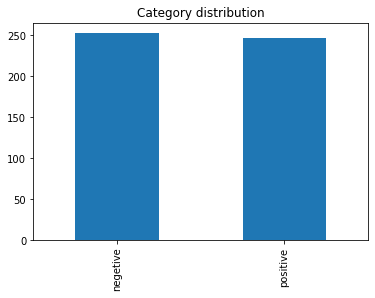

In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

print(D_sample.sentiment.value_counts())

# plot barchart for D_sample
D_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution')

#### 2.6 Feature subset selection

We will create a term-sentence matrix and generate a heap map for it.

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
D_counts = count_vect.fit_transform(D.sentence)

In [143]:
D_counts.shape

(2731, 5155)

In [144]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[1850:1890]]
#print(plot_x)

In [145]:
plot_y = ["sen_"+ str(i) for i in list(D.index)[1850:1890]]

In [146]:
plot_z = D_counts[1850:1890, 1850:1890].toarray()

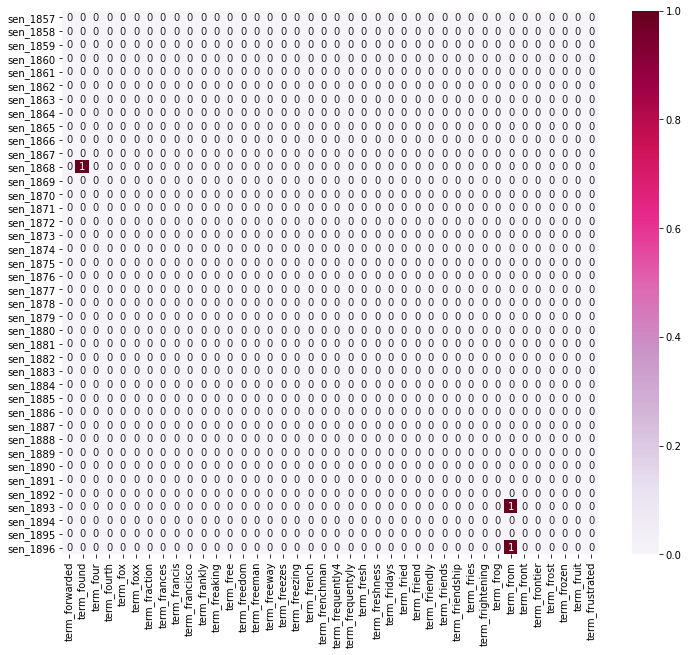

In [147]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# PART 3

## 1. Generating new visualizations

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px 

#### 1.1 Horizontal bar plot

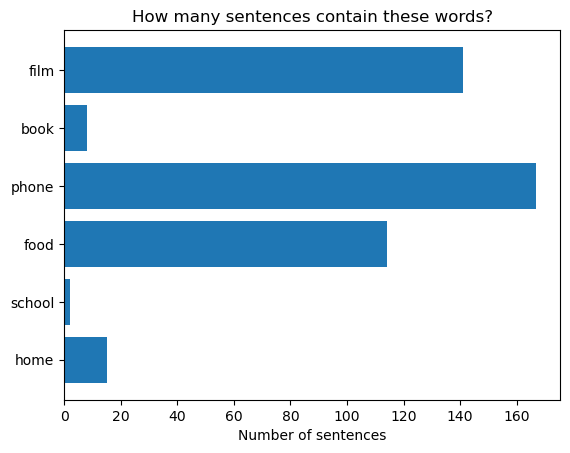

In [149]:
# In the given dataset D,
# finding how many sentences contain the words in the below list and plotting the result in a horizontal bar.
words = ["film","book","phone","food","school","home"]
occured_in_sentences = []

for t in range(0,6):
    x = D['sentence'].str.contains(words[t]).value_counts()[True]
    occured_in_sentences.append(x)
    

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(words, occured_in_sentences, align='center')
ax.set_yticks(words)
ax.set_yticklabels(words)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of sentences')
ax.set_title('How many sentences contain these words?')

plt.show()

#### 1.2 Box plot

In [150]:
# adding a new column to the dataset - sentence_length
D['sentence_length'] = D['sentence'].str.len()

fig = px.box(D, x = "score", y="sentence_length", width=700 ,height=500, points="all" ,range_y=(0,500)) 
fig.show()

#### 1.3 Scatter Matrix

In [151]:
#scatter matrix
fig = px.scatter_matrix(D,
    dimensions=["sentence_length", "sentiment"],
    color="sentiment")
fig.show()

#### 1.4 Wordcloud

In [152]:
!pip install wordcloud

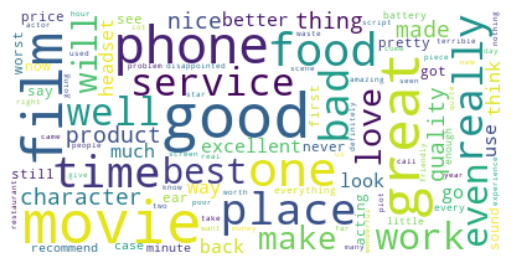

In [153]:
#Generating a wordcloud that will show most common occuring words in all the sentences in the dataset
from wordcloud import WordCloud

a = " ".join(list(D[0:].sentence)) #combining all the sentences

# Creating a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(a)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 2. TF-IDF features

Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [155]:
text_vectorizer = TfidfVectorizer()
T = text_vectorizer.fit_transform(D['sentence'])

#getting all the terms in document matrix
text_labels = text_vectorizer.get_feature_names()

print(T.shape)
print(text_labels[1000:1010]) 

(2731, 5155)
['contract', 'contrast', 'contributing', 'contributory', 'contrived', 'control', 'controls', 'controversy', 'contstruct', 'convenient']


In [156]:
#viewing just a small section of our document matrix for TF-IDF value
print(T.toarray()[1155:1160,990:1015])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0

## 3. Naive Bayes classifier

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report

In [158]:
#using TF-IDF feature to build classifier
x_train, x_test, y_train, y_test = train_test_split(T, D['score'], test_size=0.3, random_state=5)

In [159]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [160]:
accuracy_score = metrics.accuracy_score(mnb.predict(x_test),y_test)
print("MNB accuracy score TD-IDF : "+str('{:4.2f}'.format(accuracy_score*100))+'%')
print(classification_report(y_test, mnb.predict(x_test)))

MNB accuracy score TD-IDF : 81.59%
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       413
           1       0.81      0.83      0.82       407

    accuracy                           0.82       820
   macro avg       0.82      0.82      0.82       820
weighted avg       0.82      0.82      0.82       820



In [161]:
#using word frequency to build classifier
X_train, X_test, Y_train, Y_test = train_test_split(D_counts, D['score'], test_size=0.25)

In [162]:
mnb_2 = MultinomialNB()
mnb_2.fit(X_train, Y_train)

MultinomialNB()

In [163]:
accuracy_score_2 = metrics.accuracy_score(mnb_2.predict(X_test),Y_test)
print("MNB accuracy score Word Frequency : "+str('{:4.2f}'.format(accuracy_score_2*100))+'%')
print(classification_report(Y_test, mnb_2.predict(X_test)))

MNB accuracy score Word Frequency : 82.14%
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       330
           1       0.84      0.81      0.82       353

    accuracy                           0.82       683
   macro avg       0.82      0.82      0.82       683
weighted avg       0.82      0.82      0.82       683



# PART 4

In 20NewsGroup Data Set -

We created features from the tokens in the text(feature creation). There are certains tokens like 'an', 'the', 'is', 'and', 'are', etc which are common words that occur multiple times in our text. These columns can be removed (dimentionality reduction) from our dataset as they do not convey any meaningful information. Instead they skew the projections for frequency as these words occupy the status of most frequent words and hence we cant observe meaningful words.

In Sentiment Labelled Sentences Data Set -

We created a new column 'sentiment' values - positive/negetive.
This makes the task easy during visualization because we do not need to map 0 to negetive and 1 to positive everytime.
However, if the dataset becomes very large, we can drop this attribute because columns 'score' and 'sentiment' convey the same meaning and can be treated as redundant columns.